# High dimensional geodesics
> Generalizing the geodesic function to higher dimensions

In [2]:
%load_ext autoreload
%autoreload 2

To-do list:
* Generalize geodesics to arbitrary curvature (recompute $\alpha$ as a function of $K$ and $theta$)
* Generalize geodesics to higher dimensions:
    * Computational sanity check: do we keep on hyperboloid?

Recall, here is where we are currently:
* Based on assumption that we intersect with only $x_0$ and $x_d$ nonzero, $\alpha = \sqrt{-\sec(2\theta)}$
* This means that our 2-plane intersects $\mathbb{H}^2$ at:
$$
    \langle v_0 = \alpha\sin(\theta), \ldots v_d, = \alpha\cos(\theta), \ldots \rangle
$$
* Based on the parameterization of a geodesics by vectors $u$ spacelike and $v$ on the hyperboloid, (mutually orthogonal),
we have:
$$
\begin{align}
    g_0(t) = \cosh(t)\alpha\sin(\theta)\\
    g_d(t) = \cosh(t)\alpha\cos(\theta)\\
    g_{d'}(t) = \sinh(t)
\end{align}
$$

We want to generalize this so that $\alpha$ hits any hyperboloid of arbitrary curvature, and $g$ can vary across 2+ dimensions

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# Sanity check 1: we stay on the hyperboloid in the 2-d, -1 curvature case


def alpha(theta):
    """sqrt(-sec(2 * theta))"""
    return np.sqrt(-1 / np.cos(2 * theta))


def get_vector(theta, d, num_dimensions):
    vector = np.zeros(num_dimensions + 1)
    vector[d + 1] = alpha(theta) * np.cos(theta)  # Need to shift this over by 1
    vector[0] = alpha(theta) * np.sin(theta)
    return vector


def get_geodesic(u, d_prime, n_points=100):
    t = np.linspace(-1, 1, n_points)
    v = np.zeros(u.shape[0])
    v[d_prime + 1] = 1
    return np.cosh(t)[:, None] * u + np.sinh(t)[:, None] * v


def minkowski_norm(points):
    if points.ndim == 1:
        points = points[None, :]
    return np.sum(points[:, 1:] ** 2, axis=1) - points[:, 0] ** 2


def is_on_hyperboloid(points):
    if points.ndim == 1:
        points = points[None, :]
    return np.allclose(minkowski_norm(points), -1)


u = get_vector(np.pi / 3, 1, 10)
geo = get_geodesic(u, 2)

print(is_on_hyperboloid(u))
print(is_on_hyperboloid(geo))

True
True


## Generalizing to changes in curvature

The original derivation was based on the assumption that $x_d^2 - x_0^2 = - 1$. Let's do a new more general one:

$$
\begin{align}
x_d^2 - x_0^2 & = -1/K\\
x^2d &= -1/K + x_0^2\\
\alpha^2\cos^2(\theta) &= -1/K + \alpha^2\sin^2(\theta)\\
\alpha^2(\cos^2(\theta) - \sin^2(\theta)) &= -1/K\\
K\alpha^2 &= \frac{-1}{\cos^2(\theta) - \sin^2(\theta)}\\
\ldots
\end{align}
$$

The rest is the same, so we conclude $\sqrt{K}\alpha = \sqrt{-\sec(2\theta)}$, i.e. 
$$
\alpha = \frac{\sqrt{-\sec(2\theta)}}{\sqrt{K}}
$$

Here we demonstrate numerically that this corresponds to geodesics parameterized by

$$
\begin{align}
    g_0(t) = \frac{\cosh(t)\alpha\sin(\theta)}{\sqrt{K}}\\
    g_d(t) = \frac{\cosh(t)\alpha\cos(\theta)}{\sqrt{K}}\\
    g_{d'}(t) = \frac{\sinh(t)}{\sqrt{K}}
\end{align}
$$

Here we use the same formulation $\alpha = \sqrt{-\sec(2\theta)}$ as above, to preserve similarity and highlight the role played by $\sqrt{K}$

In [107]:
# Sanity check 1: we stay on the hyperboloid in the 2-d, -1 curvature case


def get_geodesic(u, d_prime, K=1, n_points=100):
    t = np.linspace(-1, 1, n_points)
    v = np.zeros(u.shape[0])
    v[d_prime + 1] = 1
    return (np.cosh(t)[:, None] * u + np.sinh(t)[:, None] * v) / np.sqrt(K)


def is_on_hyperboloid(points, K=1):
    K = np.abs(K)
    return np.allclose(minkowski_norm(points), -1 / K)


def change_curvature(points, K=1):
    K = np.abs(K)
    current_norm = minkowski_norm(points)
    return points * np.sqrt(np.abs(current_norm / K))


u = get_vector(np.pi / 3, 1, 10)
geo = get_geodesic(u, 2, K=0.5)

print(is_on_hyperboloid(u, K=0.5))  # This will be False because we don't rescale yet
print(is_on_hyperboloid(change_curvature(u, K=0.5), K=0.5))
print(is_on_hyperboloid(geo, K=0.5))

False
True
True


## Generalizing to $\mathbb{H}^3$

So, we've determined that we can start with this point:

$$
    v = \left\langle x_0 = \frac{\alpha\sin(\theta)}{\sqrt{K}}, \ldots, x_d = \frac{\alpha\cos(\theta)}{\sqrt{K}}, \ldots \right\rangle
$$

Where all other dimensions are 0, and extend it to a 2-d geodesic by picking a direction and rescaling it:
$$
    \gamma(t) = \cosh(t)u + \frac{\sinh(t)v}{\sqrt{K}},
$$
where $v$ is a one-hot vector in a spacelike dimension that isn't $d$. So let's say we wanted to add a new parameter $t'$ in a new dimension, $d'$. What are some options?

$$
    \gamma(t,t') = \cosh(t)\cosh(t')u + \frac{\cosh(t')\sinh(t)v}{\sqrt{K}} + \frac{\cosh(t)\sinh(t')v'}{\sqrt{K}}
$$
^ This is my best guess so far. Let's try it?

### Hypothesis 1

## 

In [179]:
# First attempt at a geodesic


def get_geodesic_hypothesis1(u, d_prime, d_prime_prime, K=1, n_points=101):
    t1 = np.linspace(-1, 1, n_points)
    v1 = np.zeros(u.shape[0])
    v1[d_prime + 1] = 1

    t2 = np.linspace(-1, 1, n_points)
    v2 = np.zeros(u.shape[0])
    v2[d_prime_prime + 1] = 1

    tt1, tt2 = np.meshgrid(t1, t2)
    tt1 = tt1.flatten()
    tt2 = tt2.flatten()

    out = np.zeros((n_points**2, u.shape[0]))

    # cosh(t)cosh(t')u + sinh(t)cosh(t')v + cosh(t)sinh(t')v'
    out += np.cosh(tt1)[:, None] * np.cosh(tt2)[:, None] * u
    out += np.sinh(tt1)[:, None] * np.cosh(tt2)[:, None] * v1
    out += np.cosh(tt1)[:, None] * np.sinh(tt2)[:, None] * v2

    out = out / np.sqrt(K)

    return out


def is_on_hyperboloid(points, K=1):
    K = np.abs(K)
    return np.allclose(minkowski_norm(points), -1 / K)


def change_curvature(points, K=1):
    K = np.abs(K)
    current_norm = minkowski_norm(points)
    return points * np.sqrt(np.abs(current_norm / K))


u = get_vector(np.pi / 3, 1, 10)
geo = get_geodesic_hypothesis1(u=u, d_prime=2, d_prime_prime=3, K=1, n_points=101)

print(is_on_hyperboloid(u, K=1))  # This will be False because we don't rescale yet
print(is_on_hyperboloid(geo, K=1))

True
False


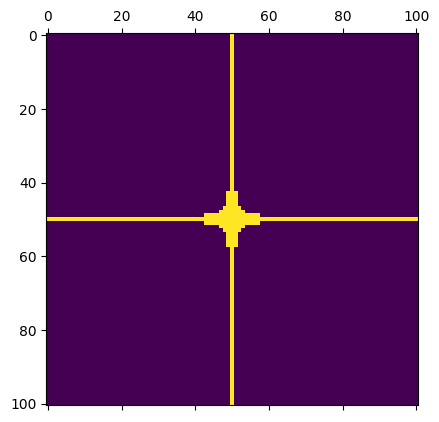

In [180]:
# Ok, so it looks like this doesn't really work: we get good behavior when t or t' is 0, but then it breaks down

plt.matshow(np.isclose(minkowski_norm(geo), -1, atol=1e-20).reshape(101, 101))

In [181]:
# In particular, it seems like the timelike dimension grows too quickly... we need to penalize this

plt.matshow(minkowski_norm(geo).reshape(101, 101))
plt.colorbar()

### Hypothesis 2

We observe that geodesic points are on the hyperboloid, and therefore have Minkowski norm $-1/K$. This means we can
continue to iterate in the manner of the first geodesic construction: let $u$ be another basis vector that is orthogonal
to $0$, $d$, and $d'$, and do the same thing:

$$
\begin{align}
\gamma'(t, t') &= \cosh(t')\gamma(t) + \sinh(t')\\
&= \cosh(t')\left( \cosh(t)u + \sinh(t)v \right) + \sinh(t')v'\\
&= \cosh(t')\cosh(t)u + \cosh(t')\sinh(t)v + \sinh(t')v'
\end{align}
$$

Presumably you should be able to iterate this until you run out of basis vectors.

In [195]:
# Next attempt: just compose things


def get_geodesic_hypothesis2(u, d_prime, d_prime_prime, K=1, n_points=101):
    t1 = np.linspace(-1, 1, n_points)
    v1 = np.zeros(u.shape[0])
    v1[d_prime + 1] = 1

    t2 = np.linspace(-1, 1, n_points)
    v2 = np.zeros(u.shape[0])
    v2[d_prime_prime + 1] = 1

    tt1, tt2 = np.meshgrid(t1, t2)
    tt1 = tt1.flatten()[:, None]
    tt2 = tt2.flatten()[:, None]

    out = np.zeros((n_points**2, u.shape[0]))

    # cosh(t')[cosh(t)u + sinh(t)v] + sinh(t')v'
    # out = np.cosh(tt1)[:, None] * u
    # out += np.sinh(tt1)[:, None] * v1
    # out *= np.cosh(tt2)[:, None]
    # out += np.sinh(tt2)[:, None] * v2

    # Or, alternatively, cosh(t')cosh(t)u + cosh(t')sinh(t)v + sinh(t')v'
    out = np.cosh(tt2) * np.cosh(tt1) * u + np.cosh(tt2) * np.sinh(tt1) * v1 + np.sinh(tt2) * v2

    return out / np.sqrt(K)


def is_on_hyperboloid(points, K=1):
    K = np.abs(K)
    return np.allclose(minkowski_norm(points), -1 / K)


def change_curvature(points, K=1):
    K = np.abs(K)
    current_norm = minkowski_norm(points)
    return points * np.sqrt(np.abs(current_norm / K))


u = get_vector(np.pi / 3, 1, 10)
geo = get_geodesic_hypothesis1(u=u, d_prime=2, d_prime_prime=3, K=1, n_points=101)

print(is_on_hyperboloid(u, K=1))  # This will be False because we don't rescale yet
print(is_on_hyperboloid(geo, K=1))

True
True


In [231]:
# Let's just try this for a bunch of different angles and curvatures, I guess

def add_dim(u, d):
    t = np.linspace(-1, 1, 100)
    v = np.zeros(u.shape[-1])
    v[d + 1] = 1
    u_expanded = np.expand_dims(u, axis=-2)  # Add a new axis second to last
    v_expanded = np.expand_dims(v, axis=0)   # Add a new axis at the beginning
    result = np.cosh(t)[:, None] * u_expanded + np.sinh(t)[:, None] * v_expanded
    return result

def geodesic_submanifold_iterative(theta, K, total_dims=10):
    u = get_vector(theta, 1, total_dims)
    for d in range(2, total_dims):
        u = add_dim(u, d)
    return u.reshape(-1, total_dims + 1) / np.sqrt(K)

k = 0.5
big_manifold = geodesic_submanifold_iterative(np.pi / 3, K=k, total_dims=6) # 6 dims takes ~ 30s
print(is_on_hyperboloid(big_manifold, K=k))

True


In [233]:
# Let's just do a "biggish" sanity check here: this takes 43.4 seconds on Eumaeus

all_true = True 
for angle in np.linspace(np.pi / 4 + 0.01, 3 * np.pi / 4 - 0.01, 100):
    for curvature in [0.25, 0.5, 1, 2, 4, 8, 16, 32]:
        big_manifold = geodesic_submanifold_iterative(theta=angle, K=curvature, total_dims=5) # 6 dims takes ~ 30s
        all_true = all_true and is_on_hyperboloid(big_manifold, K=curvature)
    
print(all_true)

True
